In [2]:
import tensorflow, keras

# Data

In [4]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

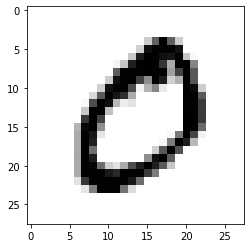

In [8]:
digit1= train_images[1]
import matplotlib.pyplot as plt
plt.imshow(digit1, cmap= plt.cm.binary)
plt.show()

# Network Connection

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
network= models.Sequential()
network.add(layers.Dense(512, activation= "relu", input_shape= (28*28,)))
network.add(layers.Dense(10, activation= "softmax"))

# Compilation Step

In [12]:
network.compile(optimizer= "rmsprop", loss= "categorical_crossentropy", metrics= ["accuracy"])

# Preprocess The Data

# Scaling

In [13]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Reshape

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [15]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# One Hot Encoding For Labels

In [19]:
train_labels[0]

5

In [20]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Training

In [22]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 11ms/step - loss: 0.2573 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1035 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0677 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0493 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0369 - accuracy: 0.9891


In [23]:
network.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0278 - accuracy: 0.9917
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0213 - accuracy: 0.9940
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0165 - accuracy: 0.9954
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0125 - accuracy: 0.9964
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0099 - accuracy: 0.9973
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0080 - accuracy: 0.9980
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0061 - accuracy: 0.9983
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0048 - accuracy: 0.9985
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 10/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0029 - accuracy

In [24]:
network.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 5s 11ms/step - loss: 3.0761e-04 - accuracy: 0.9999
Epoch 2/25
469/469 [==============================] - 6s 13ms/step - loss: 3.2503e-04 - accuracy: 0.9999
Epoch 3/25
469/469 [==============================] - 5s 11ms/step - loss: 2.1260e-04 - accuracy: 0.9999
Epoch 4/25
469/469 [==============================] - 5s 11ms/step - loss: 1.6541e-04 - accuracy: 1.0000
Epoch 5/25
469/469 [==============================] - 5s 11ms/step - loss: 3.6032e-04 - accuracy: 0.9999
Epoch 6/25
469/469 [==============================] - 5s 10ms/step - loss: 8.1171e-05 - accuracy: 1.0000
Epoch 7/25
469/469 [==============================] - 5s 10ms/step - loss: 6.2872e-05 - accuracy: 1.0000
Epoch 8/25
469/469 [==============================] - 5s 10ms/step - loss: 5.4699e-05 - accuracy: 1.0000
Epoch 9/25
469/469 [==============================] - 5s 10ms/step - loss: 5.5225e-05 - accuracy: 1.0000
Epoch 10/25
469/469 [==============================] - 

# Testing

In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1469 - accuracy: 0.9834
test_acc: 0.9833999872207642
